# Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import sys
import copy
import pickle
from sklearn.metrics import normalized_mutual_info_score
from scipy.sparse.csgraph import connected_components
from data_plotting import scatter_plot_matrix, plot_3D_data
import time
import os


sys.path.append('/home/nico/VSCodeRepos/SigMA/')
from SigMA.SigMA import SigMA
from velocity_testing.velocity_test import VelocityTester
from NoiseRemoval.RemoveNoiseTransformed import remove_noise_simple
from generate_data import DataGenerator

# Test Cases Overview & Summary

In [2]:
# contains true split
test_case_1 = [
    {
        'clusters': [0, 1],
        'mu_position': [
            [-500, -500, 20],
            [-490, -490, 35]
        ],
        'mu_std': [
            np.array([3, 5, 2]),
            np.array([4, 8, 2])
        ]
    }
]

# contains true split
test_case_2 = [
    {
        'clusters': [0, 2],
        'mu_position': [
            [20, 40, 150],
            [20, 40, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([6, 5, 5])
        ]
    }
]

# contains true split
test_case_3 = [
    {
        'clusters': [0, 3],
        'mu_position': [
            [-20, 40, 160],
            [-20, 40, 140]
        ],
        'mu_std': [
            np.array([5, 7, 3]),
            np.array([4, 5, 3])
        ]
    }
]

# contains true split
test_case_4 = [
    {
        'clusters': [0, 4],
        'mu_position': [
            [-20, 300, 160],
            [-20, 300, 150]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains true split
test_case_5 = [
    {
        'clusters': [0, 5],
        'mu_position': [
            [-20, 300, 170],
            [-20, 300, 170]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains a few noise splits
test_case_6 = [
    {
        'clusters': [1, 2],
        'mu_position': [
            [-30, -150, 180],
            [-30, -150, 160]
        ],
        'mu_std': [
            np.array([4, 2, 4]),
            np.array([6, 6, 4])
        ]
    }
]

# contains a true split
test_case_7 = [
    {
        'clusters': [1, 3],
        'mu_position': [
            [-30, 150, 180],
            [-30, 150, 160]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 4, 7])
        ]
    }
]

# contains a true split
test_case_8 = [
    {
        'clusters': [1, 4],
        'mu_position': [
            [200, -150, 0],
            [200, -170, 0]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_9 = [
    {
        'clusters': [1, 5],
        'mu_position': [
            [100, 200, -150],
            [100, 200, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_10 = [
    {
        'clusters': [2, 3],
        'mu_position': [
            [-100, 200, -150],
            [-100, 200, -150]
        ],
        'mu_std': [
            np.array([4, 4, 3]),
            np.array([7, 5, 7])
        ]
    }
]

# contains a true split and 2 noise splits
test_case_11 = [
    {
        'clusters': [2, 4],
        'mu_position': [
            [-100, 300, -150],
            [-100, 300, -150]
        ],
        'mu_std': [
            np.array([7, 7, 7]),
            np.array([7, 7, 7])
        ]
    }
]

# contains 5 noise spilts
test_case_12 = [
    {
        'clusters': [2, 5],
        'mu_position': [
            [-100, 400, -150],
            [-100, 400, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]
    }
]

# contains a few noise splits
test_case_13 = [
    {
        'clusters': [3, 4],
        'mu_position': [
            [270, 200, 300],
            [270, 200, 300]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 5])
        ]
    }
]

# contains a few noise splits
test_case_14 = [
    {
        'clusters': [3, 5],
        'mu_position': [
            [260, -100, 200],
            [260, -100, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_15 = [
    {
        'clusters': [0, 0],
        'mu_position': [
            [260, -90, 200],
            [260, -115, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_16 = [
    {
        'clusters': [1, 1],
        'mu_position': [
            [120, 20, 200],
            [120, -10, 200]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 7, 7])
        ]   
    }
]

# can contain a wrong split
test_case_17 = [
    {
        'clusters': [2, 2],
        'mu_position': [
            [400, 400, 400],
            [360, 400, 400]
        ],
        'mu_std': [
            np.array([7, 7, 4]),
            np.array([7, 7, 4])
        ]   
    }
]

# can contain a wrong split
test_case_18 = [
    {
        'clusters': [3, 3],
        'mu_position': [
            [400, 250, 400],
            [400, 265, 400]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]   
    }
]

# can contain a wrong split
test_case_19 = [
    {
        'clusters': [4, 4],
        'mu_position': [
            [-100, 250, 400],
            [-127, 250, 400]
        ],
        'mu_std': [
            np.array([4, 6, 7]),
            np.array([4, 2, 5])
        ]   
    }
]

# can contain a wrong split
test_case_20 = [
    {
        'clusters': [5, 5],
        'mu_position': [
            [200, -350, 150],
            [230, -350, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([3, 3, 5])
        ]   
    }
]

# total about:
# - 10 true splits
# - 10 noise splits
# - 5 wrong splits

# combine the test cases
test_cases = test_case_1 + test_case_2 + test_case_3 + test_case_4 + test_case_5 + test_case_6 + test_case_7 + test_case_8 + test_case_9 + test_case_10 + test_case_11 + test_case_12 + test_case_13 + test_case_14 + test_case_15 + test_case_16 + test_case_17 + test_case_18 + test_case_19 + test_case_20

In [4]:
# save test case summary to file
# with open('simulated_data/test_cases.pkl', 'wb') as f:
#     pickle.dump(test_cases, f)

# Data Creation

In [3]:
df_infos = pd.read_csv('/home/nico/VSCodeRepos/bachelor-project-implementation/simulated_data/simulated_cluster_infos.csv')

In [9]:
test_case = test_cases[0]

In [10]:
test_case

{'clusters': [0, 1],
 'mu_position': [[-500, -500, 20], [-490, -490, 35]],
 'mu_std': [array([3, 5, 2]), array([4, 8, 2])]}

In [11]:
cluster_idx = test_case['clusters']

xyz_mean = test_case['mu_position']
xyz_std = test_case['mu_std']

uvw_mean = df_infos[['U', 'V', 'W']].values[cluster_idx, :]
uvw_std =  df_infos[['U_std', 'V_std', 'W_std']].values[cluster_idx, :]

n_samples = df_infos[['n_cluster']].values[cluster_idx, :].astype(int)

In [28]:
data_generator = DataGenerator()
data_generator.generate_data(xyz_mean, uvw_mean, xyz_std, uvw_std, n_samples)
data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

Negative parallax values encountered, fixing values...
Dec out of bounds: Performing correction


In [29]:
cols = ['X', 'Y', 'Z']
# cols = ['ra', 'dec', 'parallax']
# cols = ['U', 'V', 'W']
# cols = ['pmra', 'pmdec', 'radial_velocity']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=labels_true, true_labels=None)

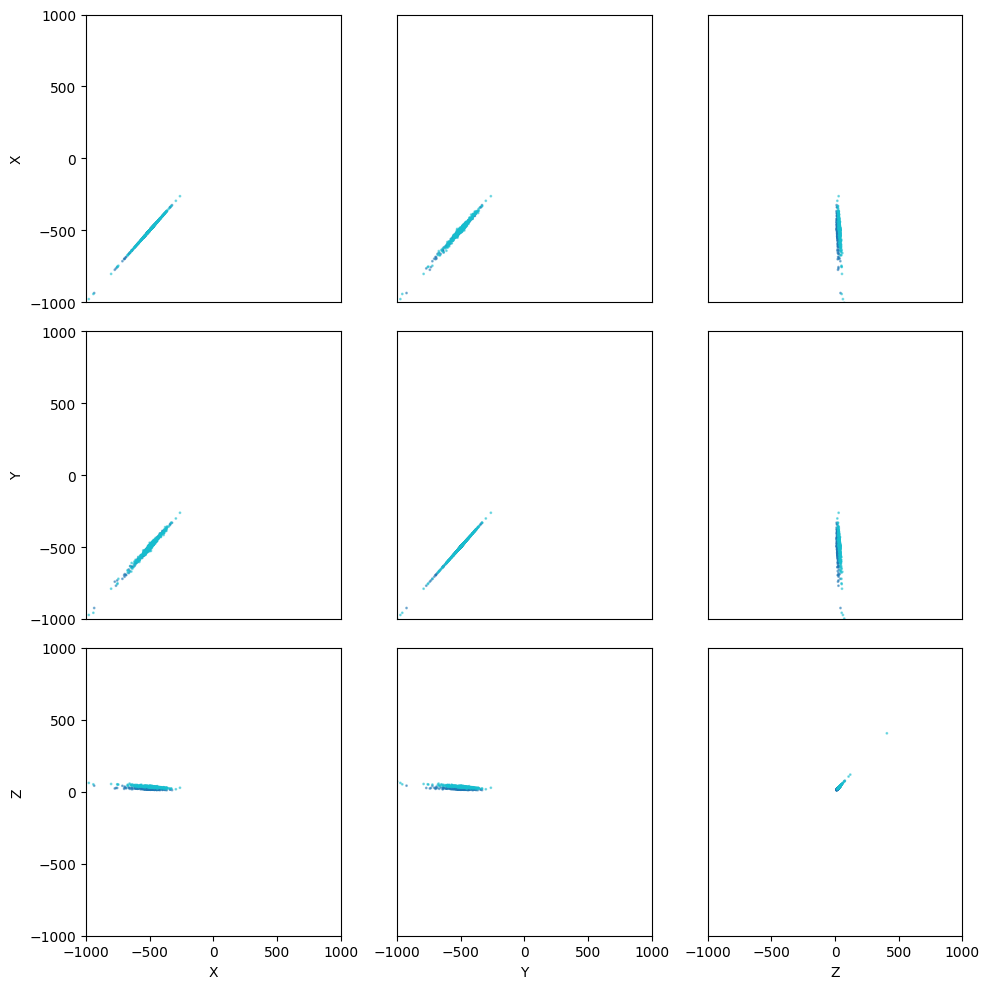

In [30]:
# only plot the true clusters
data_no_noise = copy.deepcopy(data[labels_true != -1])
labels_true_no_noise = copy.deepcopy(labels_true[labels_true != -1])

scatter_plot_matrix(data_no_noise, labels_true_no_noise, cols)

# SigMA Helper Functions

In [4]:
def extract_cluster_single(label_bool_arr, clusterer):
    # Written by Sebastian Ratzenböck
    cluster_bool_array = remove_noise_simple(label_bool_arr, te_obj=clusterer)
    if cluster_bool_array is not None:
        return cluster_bool_array
    else:
        data_idx = np.arange(clusterer.X.shape[0])
        rho = clusterer.weights_[label_bool_arr]
        mad = np.median(np.abs(rho - np.median(rho)))
        threshold = np.median(rho)*0.995 + 3 * mad * 1.05
        # Statistisch fundierterer cut
        # threshold = np.median(rho) + 3 * mad
        idx_cluster = data_idx[label_bool_arr][rho > threshold]
        if len(idx_cluster) > 20:
            # labels_with_noise[idx_cluster] = i
            # Only graph connected points allowed
            _, cc_idx = connected_components(clusterer.A[idx_cluster, :][:, idx_cluster])
            # Combine CCs data points with originally defined dense core (to not miss out on potentially dropped points)
            idx_cluster = data_idx[idx_cluster][cc_idx == np.argmax(np.bincount(cc_idx))]
        
        cluster_bool_array = np.isin(data_idx, idx_cluster)
        return cluster_bool_array
    
def extract_signal(clusterer, labels):
    # Written by Sebastian Ratzenböck
    labels_with_noise = -np.ones(clusterer.X.shape[0], dtype=int)
    for i, u_cl in enumerate(np.unique(labels[labels>-1])):
        cluster_bool_array = extract_cluster_single(labels==u_cl, clusterer)
        labels_with_noise[cluster_bool_array] = i
        
    return labels_with_noise

# Run & Plot SigMA

In [6]:
# cols2fit = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
cols2fit = ['X', 'Y', 'Z', 'U', 'V']
#df_fit = copy.deepcopy(data[cols2fit])

In [19]:
# Scale features
sf = {
    'ra': 1/0.64,
    'dec': 1/0.65,
    'parallax': 1/0.15,
    'pmra': 1/0.49,
    'pmdec': 1/0.57
}
for col in cols2fit:
    df_fit[col] *= sf[col]

KeyError: 'X'

In [33]:
sigma_kwargs = dict(
    cluster_features=cols2fit,
    scale_factors=None,
    # These are the default values and should be kept for now
    nb_resampling=0, max_knn_density=101,
    beta=0.99, knn_initcluster_graph=40,
    transform_function=None
)
clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 1.04e-05


In [34]:
cols = ['X', 'Y', 'Z']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=labels_true)
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=None)

# Compute NMI

In [35]:
nmi_data = {}
labels_pred = extract_signal(clusterer, clusterer.labels_)
nmi_data['sigma'] = normalized_mutual_info_score(labels_true, labels_pred)
nmi_data

{'sigma': 0.6362628148665853}

In [36]:
np.unique(labels_true, return_counts=True)

(array([-1,  0,  1]), array([50000,   305,   438]))

In [37]:
np.unique(clusterer.labels_, return_counts=True)

(array([ 33,  38, 437]), array([ 3535,  5621, 41587]))

In [38]:
np.unique(labels_pred, return_counts=True)

(array([-1,  0,  1,  2]), array([50151,   130,   181,   281]))

# Run Test

In [9]:
def produce_baseline(clusterer):
    _, p_values = clusterer.run_sigma(
        alpha=-np.inf, knn=15, return_pvalues=True
    )
    p_values = np.array(p_values)
    pv_sorted = np.sort(p_values[p_values < 0.05])
    # compute mid point between consecutive p-values
    mid_points = (pv_sorted[1:] + pv_sorted[:-1]) / 2
    return mid_points, clusterer.labels_

mid_points, l0 = produce_baseline(clusterer)

In [10]:
# check whether the needed split happens
l0_copy = np.copy(l0)
for alpha_i in mid_points:
    clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
    l_i = clusterer.labels_
    new_cluster_id = list(set(l_i) - set(l0_copy))
    if len(new_cluster_id) == 1:
        nc_id = new_cluster_id[0]
        part_of_old_cluster = mode(l0_copy[l_i==nc_id], keepdims=False).mode
        print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')

        # check the true labels of the two clusters
        labels_new, count_new = np.unique(labels_true[l_i==nc_id], return_counts=True)
        labels_old, count_old = np.unique(labels_true[l_i==part_of_old_cluster], return_counts=True)

        print(f'    New cluster labels: {labels_new}, counts: {count_new}')
        print(f'    Old cluster labels: {labels_old}, counts: {count_old}')

    l0_copy = np.copy(l_i)

New cluster 29561 from old cluster 533
    New cluster labels: [-1], counts: [14945]
    Old cluster labels: [-1  0  1], counts: [31209   259   353]
New cluster 47431 from old cluster 533
    New cluster labels: [-1], counts: [3692]
    Old cluster labels: [-1  0  1], counts: [27517   259   353]
New cluster 15738 from old cluster 29561
    New cluster labels: [-1], counts: [4337]
    Old cluster labels: [-1], counts: [10608]
New cluster 37674 from old cluster 47431
    New cluster labels: [-1], counts: [3332]
    Old cluster labels: [-1], counts: [360]
New cluster 471 from old cluster 533
    New cluster labels: [-1  0  1], counts: [1176   45   48]
    Old cluster labels: [-1  0  1], counts: [26341   214   305]
New cluster 206 from old cluster 533
    New cluster labels: [-1  0  1], counts: [21932   172   189]
    Old cluster labels: [-1  0  1], counts: [4409   42  116]
New cluster 28454 from old cluster 206
    New cluster labels: [-1  1], counts: [999   1]
    Old cluster labels: [-1

In [11]:
def update_labels(labels, label_old, label_new):
    updated_labels = copy.deepcopy(labels)
    updated_labels[labels == label_new] = label_old
    return updated_labels

In [13]:
%reload_ext autoreload
%autoreload 2

nmi_data = {}
test_strategies = [
    #'ttest', 
    #'bootstrap_range_test',
    #'bootstrap_difference_test',
    #'xd_mean_distance', 
    #'xd_sample_ttest', 
    #'xd_mean_distance_sample_distance', 
    #'xd_sample_bootstrap_range_test',
    #'cbve_mean_distance',
    #'cbve_sample_ttest',
    #'cbve_mean_distance_sample_distance',
    #'cbve_sample_bootstrap_range_test',
    'classifier_test'
]

for i in range(len(test_cases)):

    # create data
    test_case = test_cases[i]
    cluster_idx = test_case['clusters']
    xyz_mean = test_case['mu_position']
    xyz_std = test_case['mu_std']
    uvw_mean = df_infos[['U', 'V', 'W']].values[cluster_idx, :]
    uvw_std =  df_infos[['U_std', 'V_std', 'W_std']].values[cluster_idx, :]
    n_samples = df_infos[['n_cluster']].values[cluster_idx, :].astype(int)
    data_generator = DataGenerator()
    data_generator.generate_data(xyz_mean, uvw_mean, xyz_std, uvw_std, n_samples)
    data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

    # copy the data and add labels
    data_copy = copy.deepcopy(data)
    data_copy['labels'] = labels_true

    # create directory to save the test case results
    dir_path = f'/home/nico/Desktop/test_case/test_case{i}'
    os.makedirs(dir_path, exist_ok=True)

    # run sigma
    cols2fit = ['X', 'Y', 'Z', 'U', 'V']
    df_fit = copy.deepcopy(data[cols2fit])
    sigma_kwargs = dict(
        cluster_features=cols2fit,
        scale_factors=None,
        # These are the default values and should be kept for now
        nb_resampling=0, max_knn_density=101,
        beta=0.99, knn_initcluster_graph=40,
        transform_function=None
    )
    clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

    # produce baseline
    mid_points, l0 = produce_baseline(clusterer)

    # save labels to csv
    cluster_labels = pd.DataFrame({'sigma': l0})


    velocity_tester = VelocityTester(data, clusterer.weights_, 'none', clusterer, err_sampler)
    for test_strat in test_strategies:
        for threshold in [0.5, 1, 1.5, 2]:
            print(f'Running test strategy {test_strat}')
            split_info = []
            iteration = 1
            last_alpha = None
            l0 = cluster_labels['sigma'].values
            velocity_tester.update_testing_mode(test_strat)
            velocity_tester.update_threshold(threshold)

            # produce the splits for each alpha
            for alpha_i in mid_points:
                # fit clusterer to new alpha
                clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
                l_i = clusterer.labels_
                new_clusters_id = list(set(l_i) - set(l0))

                alpha_difference = alpha_i - last_alpha if last_alpha is not None else None
                loop_count = 0
                while len(new_clusters_id) > 1:
                    # update alpha to the mean of the mid points
                    new_alpha = last_alpha + alpha_difference

                    # fit clusterer to new alpha
                    clusterer = clusterer.fit(alpha=new_alpha, knn=15, bh_correction=False)
                    l_i = clusterer.labels_
                    new_clusters_id = list(set(l_i) - set(l0))

                    # update alpha difference
                    alpha_difference = alpha_difference / 2

                    print(f'New alpha: {new_alpha} Last alpha: {last_alpha}, new clusters: {len(new_clusters_id)}')
                    loop_count += 1
                    if loop_count > 10:
                        break

                if len(new_clusters_id) == 1: 
                    # one new cluster was generated
                    nc_id = new_clusters_id[0]
                    part_of_old_cluster = mode(l0[l_i==nc_id], keepdims=False).mode
                    print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')
                    begin = time.time()

                    # iterate splits
                    l_updated = np.copy(l_i)
                    for split in reversed(split_info):
                        if split['same_velocity'] == True:
                            l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
                            if part_of_old_cluster == split['new_cluster']:
                                print(f'New cluster {nc_id} was updated to old cluster {part_of_old_cluster}')
                                part_of_old_cluster = split['old_cluster']
                            # print(f'New cluster {splits[split]["new_cluster"]} was updated to old cluster {splits[split]["old_cluster"]}')
                                
                    # get some information for the report
                    labels_nc_id, count_nc_id = np.unique(labels_true[l_updated==nc_id], return_counts=True)
                    print(f'New cluster {nc_id} has the following true labels: {labels_nc_id} with counts {count_nc_id}')
                    labels_part_of_old_cluster, count_part_of_old_cluster = np.unique(labels_true[l_updated==part_of_old_cluster], return_counts=True)
                    print(f'Old cluster {part_of_old_cluster} has the following true labels: {labels_part_of_old_cluster} with counts {count_part_of_old_cluster}')
                    
                    # if both clusters only have labels -1, skip the velocity test as otherwise testing would take too long
                    same_velocity = False
                    test_output = 'none'
                    if len(labels_nc_id) == 1 and labels_nc_id[0] == -1 and len(labels_part_of_old_cluster) == 1 and labels_part_of_old_cluster[0] == -1:
                        print('Skipping velocity test')
                        same_velocity = True
                        test_output = 'skipped'
                        mean_deviation = 0
                        stats = None
                    else:
                        test_output, mean_deviation, stats = velocity_tester.run_test(l_updated, part_of_old_cluster, nc_id, clusterer, return_stats=True)
                        same_velocity = test_output
                        test_output = 'same velocity' if test_output else 'different velocity'

                        # check if the mean_deviation is larger than 10
                        print(mean_deviation)
                        if max(mean_deviation) > 10:
                            same_velocity = True
                            test_output += ' deviation overwrite'



                    split_info.append({
                        'new_cluster': nc_id,
                        'old_cluster': part_of_old_cluster,
                        'alpha': alpha_i,
                        'same_velocity': same_velocity,
                        'test_output': test_output,
                        'mean_deviation': mean_deviation,
                        'stats': stats,
                        'labels_nc_id': labels_nc_id,
                        'count_nc_id': count_nc_id,
                        'labels_part_of_old_cluster': labels_part_of_old_cluster,
                        'count_part_of_old_cluster': count_part_of_old_cluster,
                        'runtime': time.time() - begin
                    })

                    print(f'Test output: {test_output}, same velocity: {same_velocity}, mean deviation: {mean_deviation}')


                else:
                    print('No or more than 1 new cluster')
                iteration += 1
                l0 = np.copy(l_i)
                last_alpha = alpha_i
                print('-------------------\n')
            print('--- Finished Testing Strategy ---\n')


            # quicksave the labels to a csv file
            # cluster_labels.to_csv(dir_path + '/cluster_labels.csv', index=False)
            # save the split info with pickle
            with open(dir_path + f'/split_info_{test_strat}_{threshold}.pkl', 'wb') as f:
                pickle.dump(split_info, f)

            # compute nmi
            clusterer = clusterer.fit(alpha=mid_points[-1], knn=15, bh_correction=False)  
            labels = clusterer.labels_
            l_updated = np.copy(labels)
            for split in reversed(split_info):
                if split['same_velocity'] == True:
                    l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
            cluster_labels[test_strat] = l_updated

            labels_pred = extract_signal(clusterer, l_updated)
            nmi_data[test_strat] = normalized_mutual_info_score(labels_true, labels_pred)

            # save the nmi data to a csv file
            nmi_df = pd.DataFrame(nmi_data.items(), columns=['strategy', 'nmi'])
            nmi_df.to_csv(dir_path + '/nmi_classifier.csv', index=False)

Negative parallax values encountered, fixing values...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 1.00e-05
Running test strategy classifier_test
No or more than 1 new cluster
-------------------

New cluster 313 from old cluster 633
New cluster 313 has the following true labels: [-1  0  1] with counts [923  41  66]
Old cluster 633 has the following true labels: [-1  0  1] with counts [2347   39   63]
[1.7060806921480682, 1.3499310767849653]
Test output: different velocity, same velocity: False, mean deviation: [1.7060806921480682, 1.3499310767849653]
-------------------

New cluster 568 from old cluster 640
New cluster 568 has the following true labels: [-1  0  1] with counts [2962   76  108]
Old cluster 640 has the following true labels: [-1  0  1] with counts [43768   149   201]
[1.8508652191821038, 1.613448292127722]
Test output: different velocity, same velocity: False, mean deviation: [1.8508652191821038, 1.613448292127722]
-------

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1.6442490981566165, 3.133539390015944]
Test output: different velocity, same velocity: False, mean deviation: [1.6442490981566165, 3.133539390015944]
-------------------

New cluster 34418 from old cluster 45147
New cluster 34418 was updated to old cluster 45147
New cluster 34418 has the following true labels: [-1  1] with counts [1117    1]
Old cluster 66 has the following true labels: [-1  0  1] with counts [41659    71    26]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Running test strategy classifier_test
No or more than 1 new cluster
-------------------

New cluster 261 from old cluster 66
New cluster 261 has the following true labels: [-1  0  1] with counts [2251   51   57]
Old cluster 66 has the following true labels: [-1  0  1] with counts [44079   136    84]
[1.6446388183132357, 1.5392801737585393]
Test output: different velocity, same velocity: Fals

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1.6591979801144219, 3.3603991066041567]
Test output: different velocity, same velocity: False, mean deviation: [1.6591979801144219, 3.3603991066041567]
-------------------

New cluster 34418 from old cluster 45147
New cluster 34418 was updated to old cluster 45147
New cluster 34418 has the following true labels: [-1  1] with counts [1117    1]
Old cluster 66 has the following true labels: [-1  0  1] with counts [41659    71    26]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Running test strategy classifier_test
No or more than 1 new cluster
-------------------

New cluster 261 from old cluster 66
New cluster 261 has the following true labels: [-1  0  1] with counts [2251   51   57]
Old cluster 66 has the following true labels: [-1  0  1] with counts [44079   136    84]
[1.6446388183132357, 1.5392801737585393]
Test output: different velocity, same velocity: Fa

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1.6322470375538063, 3.133539390015944]
Test output: different velocity, same velocity: False, mean deviation: [1.6322470375538063, 3.133539390015944]
-------------------

New cluster 34418 from old cluster 45147
New cluster 34418 was updated to old cluster 45147
New cluster 34418 has the following true labels: [-1  1] with counts [1117    1]
Old cluster 66 has the following true labels: [-1  0  1] with counts [42755   127    69]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Running test strategy classifier_test
No or more than 1 new cluster
-------------------

New cluster 261 from old cluster 66
New cluster 261 has the following true labels: [-1  0  1] with counts [2251   51   57]
Old cluster 66 has the following true labels: [-1  0  1] with counts [44079   136    84]
[1.6446388183132357, 1.5392801737585393]
Test output: different velocity, same velocity: Fals

/home/nico/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1.6322470375538063, 3.133539390015944]
Test output: different velocity, same velocity: False, mean deviation: [1.6322470375538063, 3.133539390015944]
-------------------

New cluster 34418 from old cluster 45147
New cluster 34418 was updated to old cluster 45147
New cluster 34418 has the following true labels: [-1  1] with counts [1117    1]
Old cluster 66 has the following true labels: [-1  0  1] with counts [42755   127    69]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

--- Finished Testing Strategy ---

Negative parallax values encountered, fixing values...
Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 5.68e-05
Running test strategy classifier_test
No or more than 1 new cluster
-------------------

New cluster 2303 from old cluster 2150
New cluster 2303 has the following true labels: [-1  0  1] with counts [1815  767  781]
Old cluster 2150 has 